Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```
__Organize in teams of 2 people, return the exercise by Tue, Nov 12th, 2019 (10:00 AM) using ILIAS (only one Jupyter Notebook .ipyb file)__

---

Assignment 02 in R - _(20 Points)_
---------------
- ___Please put your names and student IDs here___:
    - Tobias Stähle, 987228
    - Philip Oesterlin, 993546

---

#### Exercise 1: Data Types - _(3 Points)_
Imagine you have the following dataset:

| Name 	| Gender   	| Economic status  	| Education        	|Annual income 	|
|------	|----------	|------------------	|------------------	|--------------	|
|Bob   	|Male      	| Low              	|  High School     	| 34 000       	|
|Alice 	|Female    	| Medium           	|  Master          	| 42 000       	|
|Lisa  	|Female    	| High             	|  Bachelor        	| 58 000       	|

##### __(a) Describe for each column whether it contains nominal, ordinal or numerical data and explain why you made that decision__

Name: nominal -> Names can just be classes, you can only compare if a name is 
                    equal to another one or not.
                    
Gender: nominal -> gender can just be classes, you can only compare if a gender is 
                    equal to another gender or not
                    
Economic staus: ordinal -> You can compare the economic status of two items/rows 
                by only saying it is "smaller"/"greater"/"equal"/"greater-equal"
                /"lower-equal" than/to the other one. Math operations like 
                difference or multiplication are not possible
                
education: nominal/ ordinal -> depending on how you lateron will use the data, the data can be nominal or ordinal. It would be nominal in case you use the different classes like "High School", "Master" and "Bachelor" just as labels to categorize the poeple into classes. If you use the given type of Education as a ranking of academic level of a person, it would be ordinal. For example you could rank the given people by their academic level in following ranking: "High School" < "Bachelor" < "Master".

annual income: numeric -> The annual income is a number and math operations like 
                            multiplication with a factor, difference between two 
                            values of annual income etc. can be performed

##### __(b) Give at least one mathematical operation that can be used on all three data types__

Test if two elements are equal "=" or not equal "!="

---

#### Exercise 2: Missing Values - _(8 Points)_ 

##### __(a) Import the dataset ``data_exercise2.csv`` and print the data.__ _(Hint: notice the missing values)_

In [2]:
data = read.csv("data_exercise2.csv")
print(data)

     x     y
1  0.0 3.201
2  0.2 4.568
3  0.4 5.704
4  0.6 6.456
5  0.8 6.872
6  1.0 7.000
7  1.2 6.888
8  1.4 6.584
9  1.6 6.136
10 1.8 5.892
11 2.0 5.000
12 2.2 4.308
13 2.4    NA
14 2.6    NA
15 2.8 3.112
16 3.0 3.000
17 3.2 3.128
18 3.4 3.544
19 3.6 4.296
20 3.8 5.332
21 4.0 7.100


##### __(b) Fill in the missing values using the attribute mean. Plot the result using the ``plot`` function.__

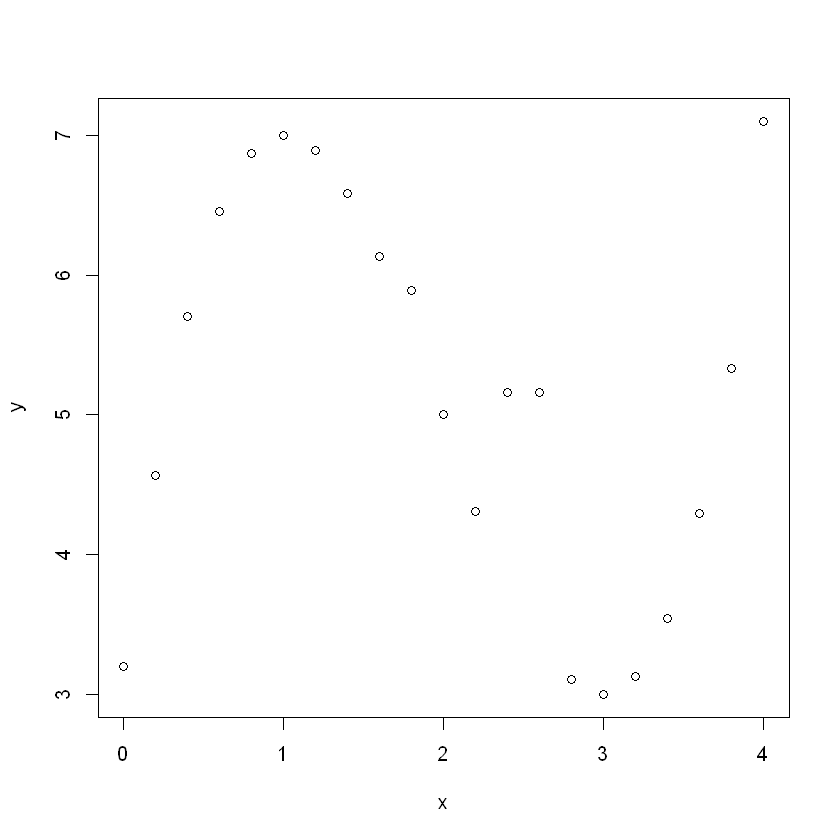

In [3]:
mean_of_data = mean(data$y,na.rm = TRUE)
data$y[is.na(data$y)] = mean_of_data
data_filled_with_mean =  data
plot(data_filled_with_mean)

##### __(c) Instead of filling the missing values with the mean, we will now try to fill them using regression.__
##### __What polynomial degree does the function you are looking for most likely have?__ _(Hint: Use the ``lm``, ``poly`` and `predict.lm` functions to create the regession model and use the ``lines`` function to plot it)_

This function looks like a function with a degree of 3 or higher. To avoid overfitting it's searched for a function with degree of 3.

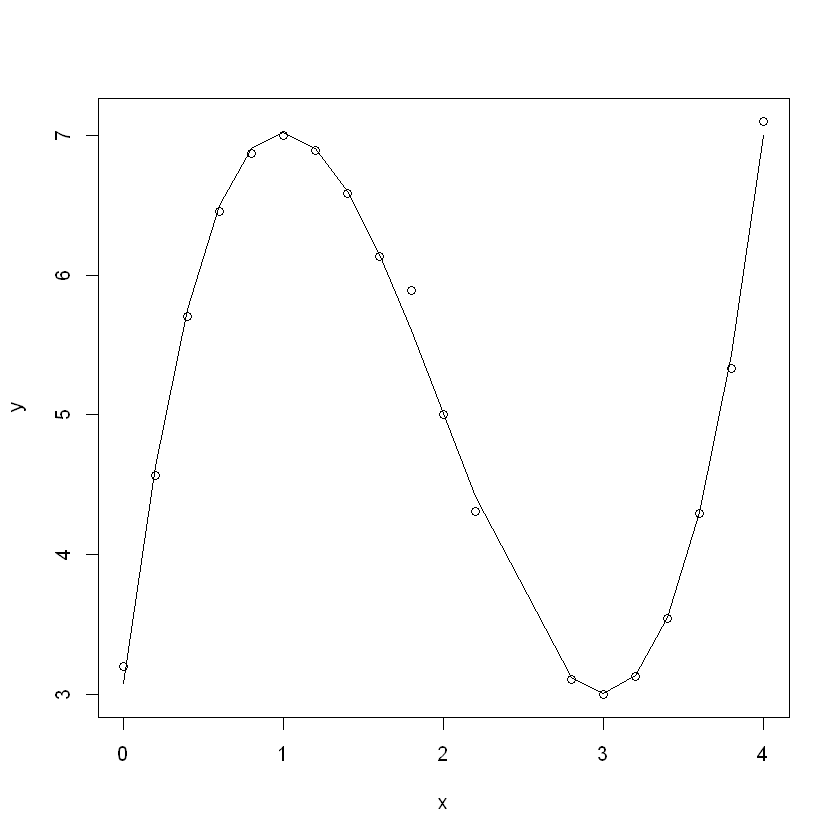

In [20]:
#Plot the regression model!!!!!!!!!!!!!!
data = read.csv("data_exercise2.csv")
data_removedNA = na.omit(data)
fm = lm(data_removedNA$y ~ poly(data_removedNA$x,3, raw=TRUE))
plot(data_removedNA)


lines(data_removedNA$x,predict(fm))

##### __(d) Compute the coefficients for the function that describes the data.__

In [21]:
coef <- fm$coefficients

print(paste(coef[4], 'x³ + ',coef[3], 'x² + ',coef[2], 'x +',coef[1],collapse=''))
summary(fm)

[1] "0.994981123090289 x³ +  -5.96214828608982 x² +  8.9073291225782 x + 3.08270611603446"



Call:
lm(formula = data_removedNA$y ~ poly(data_removedNA$x, 3, raw = TRUE))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.108591 -0.034935 -0.010776 -0.008275  0.290732 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             3.08271    0.07191   42.87   <2e-16 ***
poly(data_removedNA$x, 3, raw = TRUE)1  8.90733    0.16091   55.35   <2e-16 ***
poly(data_removedNA$x, 3, raw = TRUE)2 -5.96215    0.09687  -61.55   <2e-16 ***
poly(data_removedNA$x, 3, raw = TRUE)3  0.99498    0.01615   61.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09743 on 15 degrees of freedom
Multiple R-squared:  0.9964,	Adjusted R-squared:  0.9957 
F-statistic:  1395 on 3 and 15 DF,  p-value: < 2.2e-16


##### __(e) Use the computed polynomial coefficients to implement a regression method. Use the method to fill the missing values in the dataframe with values.__

In [6]:
calcY = function(X_es) {
  Y_ex = 3.08271+0.99498*X_es^3-5.96215*X_es*X_es+8.90733*X_es
  return(Y_ex)
}

In [8]:
data$y[is.na(data$y)] = calcY(data$x[is.na(data$y)])

##### __(f) Plot your both result (mean and polynomial regression) and compare the results. Explain which values you think fit the data better and why.__

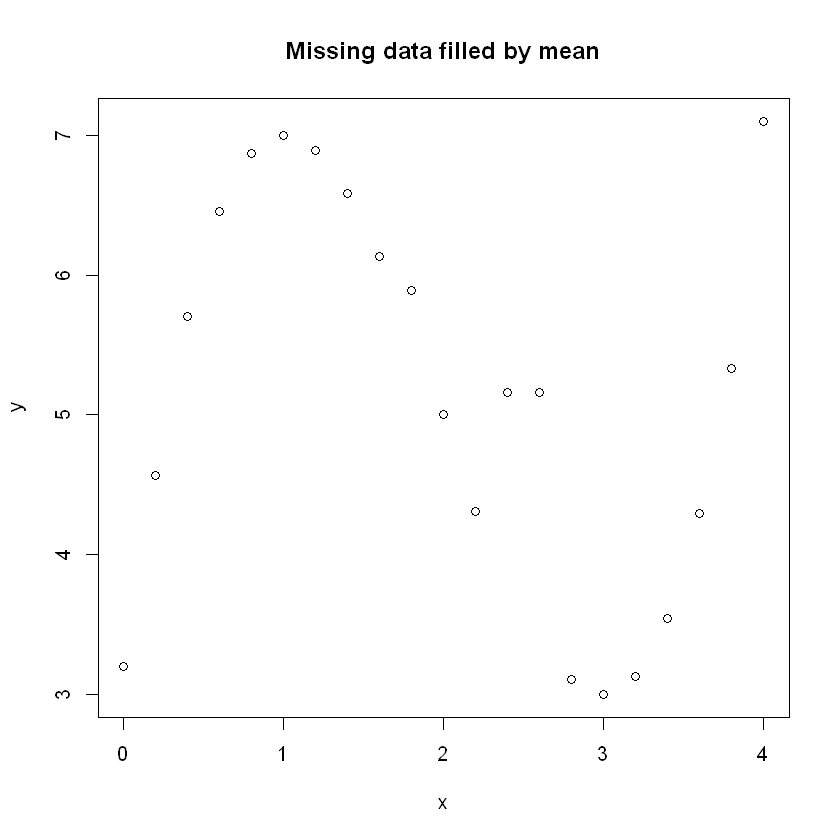

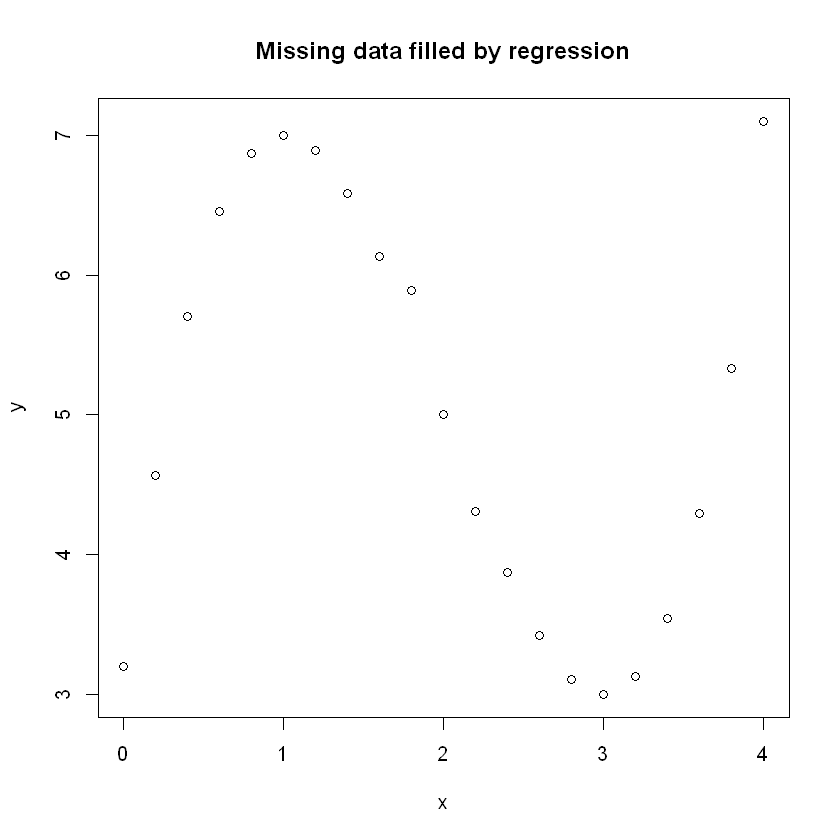

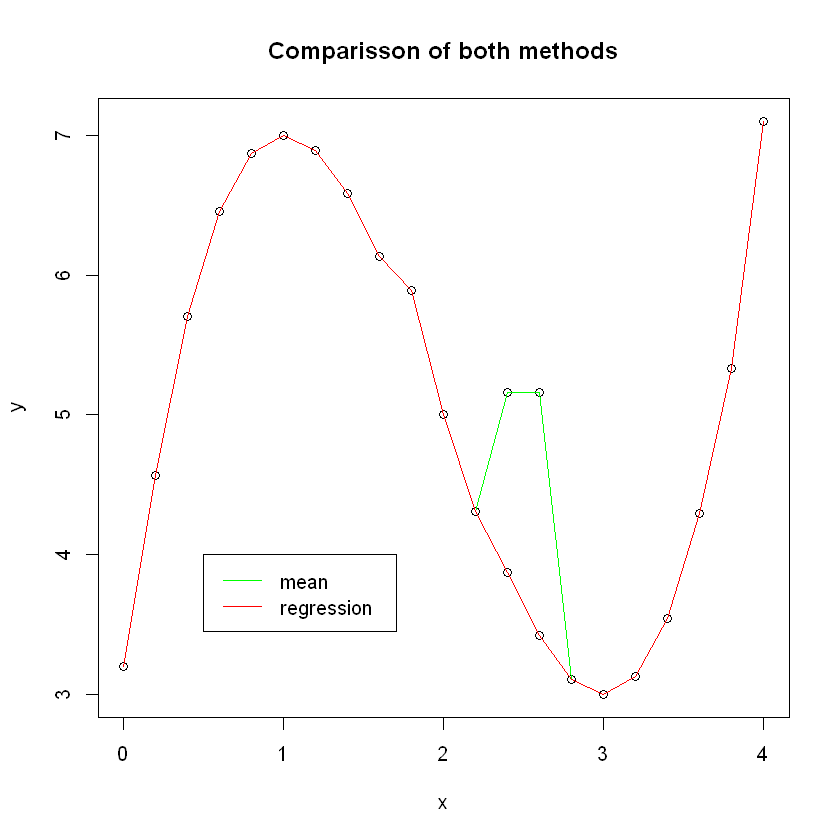

In [19]:
plot(data_filled_with_mean,main="Missing data filled by mean")
plot(data,main="Missing data filled by regression")

plot(rbind(data_filled_with_mean, data), main="Comparisson of both methods") 
lines(data_filled_with_mean,col="green")
lines(data,col="red")

legend(0.5, 4, legend=c("mean", "regression"), col=c("green", "red"), lty=c(1, 1))

Using the mean as values for the missing values leads to an "outbreak" of the shape of the data. You can think of the other data points that were given, they discribe kind of a function. Out of this function the mean values do not fit into the continuity of the shape of the given function. Using a regression model of a function with degree of 3 models a function that fits very well into the given data (see part 'c)' ). If regression is used to calculate and fill the missing values as in part 'e)' you don't have such high "outbrakers". Last mentioned method keeps the shape and trend of the function given by the given data points.

Reconstruction using mean values has produces an obvious, unnatural bump. Regression is the better choice.

---

#### Exercise 3: Binning - _(3 Points)_ 
The following data consists of the age of several people: 
```
> [13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30, 33, 33, 35, 35, 35, 35, 36, 40, 42, 46, 53, 70]
```

##### __(a) Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using R.__ 

min value = 13<br>
max value = 70<br>
width = (70 - 13) / 3 = 19<br>

bin1: 13 - 32 = [13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30] <br>
bin2: 32 - 51 = [33, 33, 35, 35, 35, 35, 36, 40, 42, 46]<br>
bin3: 51 - 90 = [53, 70]<br>

Smoothing by mean values:<br>
bin1: [21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2] if only using integers mean would be 21<br>
bin2: [37, 37, 37, 37, 37, 37, 37, 37, 37, 37]<br>
bin3: [61.5, 61.5] if only using integers mean would be 62<br>

##### __(b) Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using R.__ 

number of values = 27<br>
bin depth = 27 / 3 = 9<br>

bin1 = [13, 15, 16, 17, 19, 20, 21, 21, 22]<br>
bin2 = [22, 25, 25, 26, 26, 30, 33, 33, 35]<br>
bin3 = [35, 35, 35, 36, 40, 42, 46, 53, 70]<br>

Smoothing by mean values:<br>
bin1 = [18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2]  if only using integers mean would be 18<br>
bin2 = [28.3, 28.3, 28.3, 28.3, 28.3, 28.3, 28.3, 28.3, 28.3]  if only using integers mean would be 28<br>
bin3 = [43.5, 43.5, 43.5, 43.5, 43.5, 43.5, 43.5, 43.5, 43.5]  if only using integers mean would be 44

##### __(c) Compare the results from a) and b). Give one reason why equal-depth binning might be preferable in this scenario.__

Because of the outliers, the equal-width bins are spread out over a large range. The equal depth binning method creates a better grouping.

---

#### Exercise 4: Normalization - _(6 Points)_ 

##### __(a) Which of the columns in the following table can be normalized using the linear or logarithmic min-max normalization? Discuss if the normalization is useful or not.__

|id |Gender|Size (cm)|Weight (kg)|Hair Color|Blood Type|Glasses|
|---|------|---------|-----------|----------|----------|-------|
|22|Female|175|65|red|A|yes|
|23|Female|176|71|red|AB|yes|
|24|Female|176|71|red|O|yes|
|25|Female|179|69|black|B|yes|
|26|Female|195|62|black|B|no|
|27|Female|203|64|black|O|yes|
|28|Female|165|70|brown|AB|no|
|29|Female|172|62|brown|AB|no|
|30|Female|166|52|brown|AB|no|
|31|Female|182|67|brown|AB|no|
|32|Female|168|70|brown|O|yes|
|33|Female|168|59|blond|B|no|
|34|Male|168|62|black|B|no|
|35|Male|178|63|red|B|no|
|36|Male|178|59|red|AB|no|
|37|Male|172|67|brown|A|yes|
|38|Male|172|58|brown|A|no|
|39|Male|185|62|brown|A|no|
|40|Male|190|72|black|B|yes|
|41|Male|184|70|black|B|yes|

```
id: no normalisation
gender: no normalisation
size: linear or logarithmic normalisation
weight: linear or logarithmic normalisation
hair color: no normalisation
blood type: no normalisation
glasses: no normalisation

If every row of the data set discribes a data point in an area of muti-dimensional space (each attribute is a dimension) and you want to measure the distance between two points, e.g. you would use the formular of the euclidean distance. In every dimension the value of the one point gets substracted from the other point's value. If in one of the dimensions the range of the points is bigger than the range in an other dimension, the result of the euclidean distance mostly depends on the one dimension with the huge range of values. Normalizing the values to values between 0 and 1 reduces e.g. the dependency of the result of the euclidean distance on one special dimension. By this you get better and more meaningful results.
```

##### __(b) Using the column “Size”, use linear min-max normalization to transform the values ``166, 180, 191`` into the range ``[0, 1]``. Give the formula used to compute the values, including min/max value.__

```
min = 165, max = 203

Xnorm = (X - min) / (max - min) = (X - 165) / 38

[166, 180, 191] will be normalised to [0.03, 0.39, 0.68]
```

##### __(c) Using the column “Weight”, use logarithmic min-max normalization to transform the values ``58, 65, 69`` into the range ``[0, 1]``. Give the formula used to compute the values, in-cluding min/max value__

```
min = 52, max = 72

Xnorm = (ln(X) - ln(min)) / (ln(max) - ln(min))

[58, 65, 69] will be normalised to [0.3355617, 0.6857043, 0.8692173]
```

##### __(d) Write a method to normalize all columns of the following dataframe using the linear min-max normalization.__

In [1]:
norm <- function(data){
    maxV <- max(data)
    minV <- min(data)
    
    return ((data - minV) / (maxV - minV))
}


# use height and gender as sample data
height <- c(175,176,176,179,195,203,165,172,166,182,168,168,168,178,178,172,172,185,190,184)
gender <- c('male', 'female')
df <- data.frame(height, gender)

for(idx in 1:ncol(df)){
    row <- unlist(df[idx])
    if(typeof(row) == 'double'){
        df[[idx]] <- norm(row)
    }
}

print(df)

       height gender
1  0.26315789   male
2  0.28947368 female
3  0.28947368   male
4  0.36842105 female
5  0.78947368   male
6  1.00000000 female
7  0.00000000   male
8  0.18421053 female
9  0.02631579   male
10 0.44736842 female
11 0.07894737   male
12 0.07894737 female
13 0.07894737   male
14 0.34210526 female
15 0.34210526   male
16 0.18421053 female
17 0.18421053   male
18 0.52631579 female
19 0.65789474   male
20 0.50000000 female
